# English Premier League (EPL) Pythagorean Predictor

## Importing Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the data. 
# EPL results for the 2017/18 season
EPL = pd.read_excel('./Datasets/Engsoccer2017-18.xlsx')
print(EPL.columns.tolist())
EPL.head(10)

['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR']


,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,EPL,2017-11-08 00:00:00,Arsenal,Leicester,4,3,H
1,EPL,2017-12-08 00:00:00,Brighton,Man City,0,2,A
2,EPL,2017-12-08 00:00:00,Chelsea,Burnley,2,3,A
3,EPL,2017-12-08 00:00:00,Crystal Palace,Huddersfield,0,3,A
4,EPL,2017-12-08 00:00:00,Everton,Stoke,1,0,H
5,EPL,2017-12-08 00:00:00,Southampton,Swansea,0,0,D
6,EPL,2017-12-08 00:00:00,Watford,Liverpool,3,3,D
7,EPL,2017-12-08 00:00:00,West Brom,Bournemouth,1,0,H
8,EPL,13/08/2017,Man United,West Ham,4,0,H
9,EPL,13/08/2017,Newcastle,Tottenham,0,2,A


## Data Handling

In [3]:
# Creating Variable for Home wins 
EPL['HomeWin'] = EPL['FTR'].apply(lambda x : 1 if x == 'H' else (0.5 if x == 'D' else 0))
EPL['AwayWin'] = EPL['FTR'].apply(lambda x : 1 if x == 'A' else (0.5 if x == 'D' else 0))
EPL['Count'] = 1
EPL.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeWin,AwayWin,Count
0,EPL,2017-11-08 00:00:00,Arsenal,Leicester,4,3,H,1.0,0.0,1
1,EPL,2017-12-08 00:00:00,Brighton,Man City,0,2,A,0.0,1.0,1
2,EPL,2017-12-08 00:00:00,Chelsea,Burnley,2,3,A,0.0,1.0,1
3,EPL,2017-12-08 00:00:00,Crystal Palace,Huddersfield,0,3,A,0.0,1.0,1
4,EPL,2017-12-08 00:00:00,Everton,Stoke,1,0,H,1.0,0.0,1


In [4]:
EPL['Date'] = pd.to_datetime(EPL["Date"])
mask = EPL['Date'].dt.year < 2018
EPL17 = EPL[mask]
EPL18 = EPL[~mask]

## 2017 Data

In [5]:
EPL17_h = EPL17.groupby(['HomeTeam', 'Div'])['Count', 'FTHG', 'FTAG', 'HomeWin'].sum().reset_index()
EPL17_a = EPL17.groupby(['AwayTeam', 'Div'])['Count', 'FTHG', 'FTAG', 'AwayWin'].sum().reset_index()
EPL17_h = EPL17_h.rename(columns = {'HomeTeam': 'Team', 'Count': 'Ph', 'FTHG': 'FTHGh', 'FTAG': 'FTAGh'})
EPL17_a = EPL17_a.rename(columns = {'AwayTeam': 'Team', 'Count': 'Pa', 'FTHG': 'FTHGa', 'FTAG': 'FTAGa'})
EPL17_teams = pd.merge(EPL17_h, EPL17_a, on = ['Team', 'Div'])

In [6]:
EPL17_teams['Wins'] = EPL17_teams['HomeWin'] + EPL17_teams['AwayWin']
EPL17_teams['Games'] = EPL17_teams['Ph'] + EPL17_teams['Pa']
EPL17_teams['GF'] = EPL17_teams['FTHGh'] + EPL17_teams['FTAGa']
EPL17_teams['GA'] = EPL17_teams['FTHGa'] + EPL17_teams['FTAGh']
EPL17_teams['wpc_17'] = EPL17_teams['Wins']/EPL17_teams['Games']
EPL17_teams['PythExp_17'] = (EPL17_teams['GF']**2)/(EPL17_teams['GF']**2 + EPL17_teams['GA']**2)
EPL17_teams

,Team,Div,Ph,FTHGh,FTAGh,HomeWin,Pa,FTHGa,FTAGa,AwayWin,Wins,Games,GF,GA,wpc_17,PythExp_17
0,AFC Wimbledon,FL1,12,11,17,4.5,12,14,9,4.5,9.0,24,20,31,0.375000,0.293902
1,Accrington,FL2,11,19,12,7.0,13,18,19,7.0,14.0,24,38,30,0.583333,0.616041
2,Arsenal,EPL,10,25,10,8.5,11,16,13,5.0,13.5,21,38,26,0.642857,0.681132
3,Aston Villa,FLCH,12,17,10,8.5,13,14,16,6.5,15.0,25,33,24,0.600000,0.654054
4,Barnet,FL2,12,10,14,4.5,13,23,15,3.0,7.5,25,25,37,0.300000,0.313440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,West Ham,EPL,9,10,14,4.0,11,24,12,3.0,7.0,20,22,38,0.350000,0.251037
88,Wigan,FL1,13,21,4,10.0,11,8,28,8.5,18.5,24,49,12,0.770833,0.943418
89,Wolves,FLCH,12,25,10,10.0,13,10,22,10.0,20.0,25,47,20,0.800000,0.846685
90,Wycombe,FL2,13,27,18,8.5,12,16,17,6.0,14.5,25,44,34,0.580000,0.626132


## 2018 Data

In [7]:
EPL18_h = EPL18.groupby(['HomeTeam', 'Div'])['Count', 'FTHG', 'FTAG', 'HomeWin'].sum().reset_index()
EPL18_a = EPL18.groupby(['AwayTeam', 'Div'])['Count', 'FTHG', 'FTAG', 'AwayWin'].sum().reset_index()
EPL18_h = EPL18_h.rename(columns = {'HomeTeam': 'Team', 'Count': 'Ph', 'FTHG': 'FTHGh', 'FTAG': 'FTAGh'})
EPL18_a = EPL18_a.rename(columns = {'AwayTeam': 'Team', 'Count': 'Pa', 'FTHG': 'FTHGa', 'FTAG': 'FTAGa'})
EPL18_teams = pd.merge(EPL18_h, EPL18_a, on = ['Team', 'Div'])

In [8]:
EPL18_teams['Wins'] = EPL18_teams['HomeWin'] + EPL18_teams['AwayWin']
EPL18_teams['Games'] = EPL18_teams['Ph'] + EPL18_teams['Pa']
EPL18_teams['GF'] = EPL18_teams['FTHGh'] + EPL18_teams['FTAGa']
EPL18_teams['GA'] = EPL18_teams['FTHGa'] + EPL18_teams['FTAGh']
EPL18_teams['wpc_18'] = EPL18_teams['Wins']/EPL18_teams['Games']
EPL18_teams['PythExp_18'] = (EPL18_teams['GF']**2)/(EPL18_teams['GF']**2 + EPL18_teams['GA']**2)
EPL18_teams

,Team,Div,Ph,FTHGh,FTAGh,HomeWin,Pa,FTHGa,FTAGa,AwayWin,Wins,Games,GF,GA,wpc_18,PythExp_18
0,AFC Wimbledon,FL1,11,14,13,6.5,11,14,13,4.5,11.0,22,27,27,0.500000,0.500000
1,Accrington,FL2,12,23,7,11.5,10,9,15,6.5,18.0,22,38,16,0.818182,0.849412
2,Arsenal,EPL,9,29,10,7.5,8,15,7,1.0,8.5,17,36,25,0.500000,0.674649
3,Aston Villa,FLCH,11,25,9,9.0,10,9,14,5.5,14.5,21,39,18,0.690476,0.824390
4,Barnet,FL2,11,14,11,6.5,10,17,7,3.0,9.5,21,21,28,0.452381,0.360000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,West Ham,EPL,10,14,12,6.0,8,18,12,3.0,9.0,18,26,30,0.500000,0.428934
88,Wigan,FL1,10,16,7,7.0,12,10,24,9.0,16.0,22,40,17,0.727273,0.847009
89,Wolves,FLCH,11,22,8,8.5,10,11,13,6.0,14.5,21,35,19,0.690476,0.772383
90,Wycombe,FL2,10,16,17,6.0,11,9,19,9.5,15.5,21,35,26,0.738095,0.644398


## Conclusions

In [9]:
EPL17_18 = pd.merge(EPL17_teams, EPL18_teams, on = ['Team', 'Div'])
EPL_Predictor = EPL17_18.drop(['Ph_x', 'FTHGh_x', 'FTAGh_x', 'HomeWin_x', 'Pa_x', 'FTHGa_x', 
                         'FTAGa_x', 'AwayWin_x', 'Wins_x', 'Games_x', 'GF_x', 'GA_x', 'Ph_y',
                         'FTHGh_y', 'FTAGh_y', 'HomeWin_y', 'Pa_y', 'FTHGa_y', 'FTAGa_y', 
                         'AwayWin_y', 'Wins_y', 'Games_y', 'GF_y', 'GA_y'], axis = 1)
EPL_Predictor

,Team,Div,wpc_17,PythExp_17,wpc_18,PythExp_18
0,AFC Wimbledon,FL1,0.375000,0.293902,0.500000,0.500000
1,Accrington,FL2,0.583333,0.616041,0.818182,0.849412
2,Arsenal,EPL,0.642857,0.681132,0.500000,0.674649
3,Aston Villa,FLCH,0.600000,0.654054,0.690476,0.824390
4,Barnet,FL2,0.300000,0.313440,0.452381,0.360000
...,...,...,...,...,...,...
87,West Ham,EPL,0.350000,0.251037,0.500000,0.428934
88,Wigan,FL1,0.770833,0.943418,0.727273,0.847009
89,Wolves,FLCH,0.800000,0.846685,0.690476,0.772383
90,Wycombe,FL2,0.580000,0.626132,0.738095,0.644398


### Correlation

In [10]:
corr_matrix = EPL_Predictor.corr()
corr_matrix

,wpc_17,PythExp_17,wpc_18,PythExp_18
wpc_17,1.000000,0.959210,0.601684,0.618430
PythExp_17,0.959210,1.000000,0.615636,0.651551
wpc_18,0.601684,0.615636,1.000000,0.942746
PythExp_18,0.618430,0.651551,0.942746,1.000000


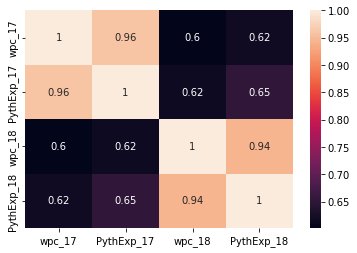

In [11]:
sns.heatmap(corr_matrix, annot=True)
plt.show()

We can see that pythogorean expectation of 2017 data (`PythExp_17`) has a higher correlation (0.616) with `wpc_18` than the `wpc_171` (0.602), indicating that it is a better predictor of any team's second half performance than win %.

#### `wpc_18` vs. `PythExp_17`

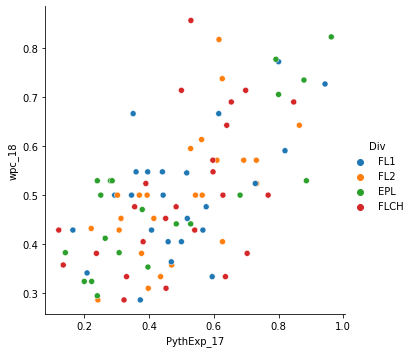

In [12]:
sns.relplot(x="PythExp_17", y="wpc_18", data = EPL_Predictor, hue = 'Div')
plt.show()

#### `wpc_18` vs. `wpc_17`

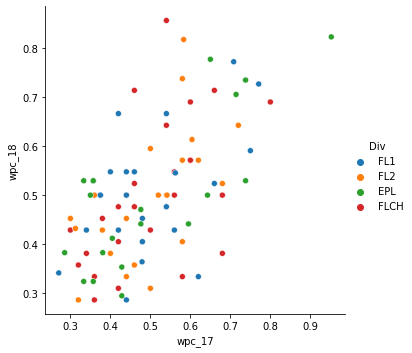

In [13]:
sns.relplot(x="wpc_17", y="wpc_18", data = EPL_Predictor, hue = 'Div')
plt.show()

### Regression

#### `wpc_17` vs. `PythExp_17`

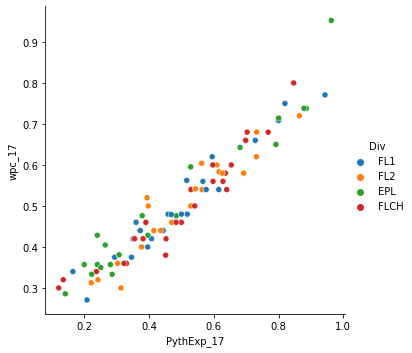

In [14]:
sns.relplot(x="PythExp_17", y="wpc_17", data =EPL_Predictor,hue='Div')
plt.show()

In [15]:
pyth_lm = smf.ols(formula = 'wpc_17 ~ PythExp_17', data=EPL_Predictor).fit()
pyth_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 wpc_17   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     1036.
Date:                Thu, 24 Nov 2022   Prob (F-statistic):           3.63e-51
Time:                        15:33:20   Log-Likelihood:                 168.89
No. Observations:                  92   AIC:                            -333.8
Df Residuals:                      90   BIC:                            -328.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1815      0.011     16.966      0.000       0.160       0.203
PythExp_17     0.6504      0.020     32.190      0.000       0.610       0.691
==============================================================================
Omnibus:                       11.446   Durbin-Watson:                   2.174
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               13.196
Skew:                           0.669   Prob(JB):                      0.00136
Kurtosis:                       4.286   Cond. No.                         6.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### `wpc_18` vs. `PythExp_18`

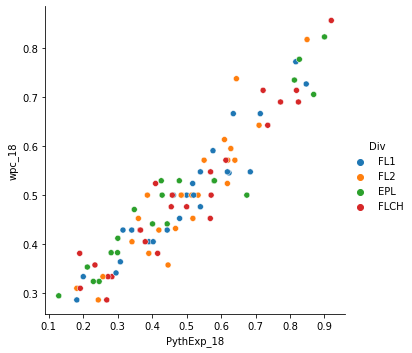

In [16]:
sns.relplot(x="PythExp_18", y="wpc_18", data =EPL_Predictor,hue='Div')
plt.show()

In [17]:
pyth_lm = smf.ols(formula = 'wpc_18 ~ PythExp_18', data=EPL_Predictor).fit()
pyth_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 wpc_18   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     719.1
Date:                Thu, 24 Nov 2022   Prob (F-statistic):           1.07e-44
Time:                        15:33:20   Log-Likelihood:                 153.55
No. Observations:                  92   AIC:                            -303.1
Df Residuals:                      90   BIC:                            -298.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1716      0.013     13.059      0.000       0.145       0.198
PythExp_18     0.6671      0.025     26.817      0.000       0.618       0.716
==============================================================================
Omnibus:                        0.823   Durbin-Watson:                   2.345
Prob(Omnibus):                  0.662   Jarque-Bera (JB):                0.354
Skew:                           0.028   Prob(JB):                        0.838
Kurtosis:                       3.299   Cond. No.                         6.47
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""